In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

In [33]:
# import data from files

X = pd.read_csv('../Data/train_values.csv')
Y = pd.read_csv('../Data/train_labels.csv')

In [34]:
# Columns
pd.DataFrame(X.columns)

,0
0,row_id
1,loan_type
2,property_type
3,loan_purpose
4,occupancy
5,loan_amount
6,preapproval
7,msa_md
8,state_code
9,county_code


In [35]:
# peek X (features)
X.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [36]:
# summary of X
#display(X.describe())
display(X.iloc[:, : 8].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))
display(X.iloc[:, 8 : 16].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))
display(X.iloc[:, 16 : ].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
10%,49999.900000,1.000000,1.000000,1.000000,1.000000,42.000000,2.000000,-1.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000
90%,449999.100000,2.000000,1.000000,3.000000,2.000000,407.000000,3.000000,371.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000


,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000
mean,23.726924,144.542062,2.036228,4.786586,1.462374,102.389521,5416.833956,31.617310
std,15.982768,100.243612,0.511351,1.024927,0.677685,153.534496,2728.144999,26.333938
min,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.534000
10%,2.000000,11.000000,1.000000,3.000000,1.000000,31.000000,2801.000000,5.211000
25%,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.700000
50%,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.901000
75%,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.020000
90%,46.000000,288.000000,3.000000,6.000000,2.000000,183.000000,8125.000000,75.442700
max,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000


,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,17858.000000,3.981000,4.000000,1.000000,0.000000
10%,53052.000000,69.993000,638.000000,943.000000,950.000000
25%,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
90%,89104.100000,100.000000,2272.000000,2918.000000,6240.000000
max,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [37]:
# peek Y (labels)
Y.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [38]:
# summary of Y
print("Total: " + str(Y.shape[0]))
print("Accepted: " + str(Y[Y["accepted"]==1].shape[0]))
print("Not accepted: " + str(Y[Y["accepted"]==0].shape[0]))

print("Total not 0/1 values: " + str( Y.shape[0] - Y[Y["accepted"]==1].shape[0] - Y[Y["accepted"]==0].shape[0] ))

Total: 500000
Accepted: 250114
Not accepted: 249886
Total not 0/1 values: 0


In [39]:
# create complete dataframe for cleanup
data = pd.DataFrame(X)
data = data.merge(Y, on='row_id')
data.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

In [40]:
# Make co_applicant numeric
data["co_applicant"].replace({True: 1, False: 0}, inplace=True)

In [41]:
# Create pairplot for inspection of feature interaction
"""
ax = sns.pairplot(data[["loan_amount",
                  "applicant_income",
                  "co_applicant",
                  "population",
                  "minority_population_pct",
                  "ffiecmedian_family_income",
                  "tract_to_msa_md_income_pct",
                  "number_of_owner-occupied_units",
                  "number_of_1_to_4_family_units",
                  "accepted"]].replace({-1: np.nan}).dropna(), hue="accepted")

display(ax)
"""

'\nax = sns.pairplot(data[["loan_amount",\n                  "applicant_income",\n                  "co_applicant",\n                  "population",\n                  "minority_population_pct",\n                  "ffiecmedian_family_income",\n                  "tract_to_msa_md_income_pct",\n                  "number_of_owner-occupied_units",\n                  "number_of_1_to_4_family_units",\n                  "accepted"]].replace({-1: np.nan}).dropna(), hue="accepted")\n\ndisplay(ax)\n'

Text(0.5, 0, 'loan_amount')

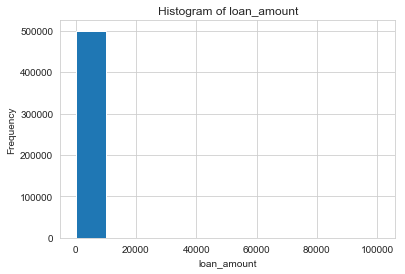

In [42]:
# Histogram for the distribution of the loan_amounts
#sns.distplot(X["loan_amount"][X["loan_amount"]<1000], hist=True, kde=False, bins=10)
ax = X["loan_amount"].plot(kind="hist", x="loan_amount", title="Histogram of loan_amount")
ax.set_xlabel("loan_amount")

Text(0.5, 0, 'loan_amount')

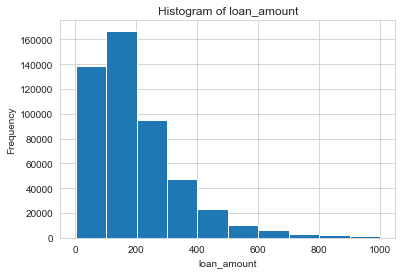

In [43]:
ax = X["loan_amount"][X["loan_amount"]<1000].plot(kind="hist", x="loan_amount", title="Histogram of loan_amount")
ax.set_xlabel("loan_amount")

Text(0.5, 0, 'applicant_income')

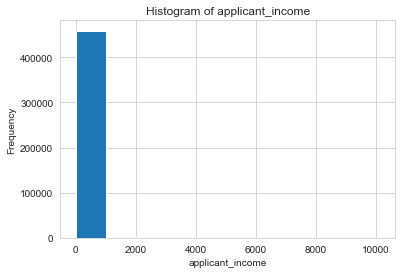

In [44]:
ax = X["applicant_income"].plot(kind="hist", x="applicant_income", title="Histogram of applicant_income")
ax.set_xlabel("applicant_income")

Text(0.5, 0, 'applicant_income')

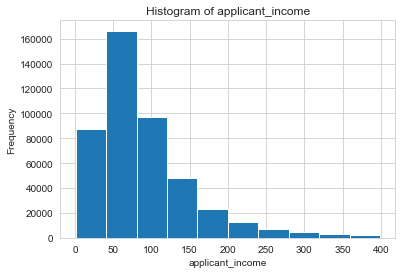

In [45]:
ax = X["applicant_income"][X["applicant_income"]<400].plot(kind="hist", x="applicant_income", title="Histogram of applicant_income")
ax.set_xlabel("applicant_income")

In [52]:
data.replace({-1: np.nan}, inplace=True)

data.isnull().sum(axis=0)

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76982
state_code                        19132
county_code                       20466
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [74]:
res = data.describe() - data[data["msa_md"].isna()].describe()
display(res.iloc[:, : 10])
display(res.iloc[:, 10 : 17])
display(res.iloc[:, 17 : ])

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code
count,423018.000000,423018.000000,423018.000000,423018.000000,423018.000000,423018.000000,423018.000000,423018.0,423018.000000,423018.000000
mean,678.113871,-0.080854,-0.069234,0.287368,-0.005710,67.871393,0.312564,NaN,0.804150,-2.540646
std,174.968415,-0.127782,-0.096128,0.020824,-0.012368,306.180773,-0.296549,NaN,0.816797,1.615671
min,-17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,458.000000,0.000000,0.000000,0.000000,0.000000,28.000000,1.000000,NaN,-1.000000,0.000000
50%,754.500000,0.000000,0.000000,1.000000,0.000000,47.000000,0.000000,NaN,2.000000,0.000000
75%,900.250000,0.000000,0.000000,0.000000,0.000000,78.000000,0.000000,NaN,0.000000,1.000000
max,2.000000,0.000000,0.000000,0.000000,0.000000,56529.000000,0.000000,NaN,0.000000,0.000000


,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income
count,423018.000000,423018.000000,423018.000000,387432.000000,422886.000000,422885.000000,422911.000000
mean,-0.036646,-0.092282,0.016607,20.746103,851.908833,14.477398,14390.052931
std,0.050279,0.138240,0.019734,12.798721,1019.221530,7.434617,7735.806572
min,0.000000,0.000000,0.000000,0.000000,-90.000000,0.000000,-188.000000
25%,0.000000,0.000000,0.000000,10.000000,414.000000,6.453000,10910.000000
50%,0.000000,0.000000,0.000000,16.000000,602.000000,13.692000,13173.000000
75%,0.000000,0.000000,0.000000,26.000000,828.000000,23.170000,15546.000000
max,0.000000,0.000000,0.000000,231.000000,23758.000000,0.000000,35667.000000


,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
count,422837.000000,422788.000000,422821.000000,423018.000000,423018.000000,423018.000000
mean,-1.853550,114.099566,-176.392963,119.713119,-0.009446,0.161279
std,3.807887,250.013885,152.871220,52.596919,-0.001835,0.026645
min,-16.762000,-11.000000,-36.000000,-7.000000,0.000000,0.000000
25%,-1.964750,-20.000000,-229.000000,124.000000,0.000000,0.000000
50%,0.000000,59.000000,-207.000000,159.000000,0.000000,1.000000
75%,0.000000,154.000000,-183.000000,410.000000,0.000000,0.000000
max,0.000000,5282.000000,6310.000000,1.000000,0.000000,0.000000


In [ ]:
# Comparison of the mean acceptances for ethnicity and sex

print("Mean acceptance rate for ethnicity 4: ")
print(data[data["applicant_ethnicity"]==4]["accepted"].mean())
print("Mean acceptance rate for ethnicity 1: ")
print(data[data["applicant_ethnicity"]==1]["accepted"].mean())
print("Mean acceptance rate for applicant sex 1: ")
print(data[data["applicant_sex"]==1]["accepted"].mean())
print("Mean acceptance rate for applicant sex 2: ")
print(data[data["applicant_sex"]==2]["accepted"].mean())

In [ ]:
# Relationship between income and loan_amount
sns.pairplot(data[data["state_code"]==45][["applicant_income", "loan_amount"]].dropna())

In [ ]:
# Variation of the mean number of acceptances on county level in state 48
variations = data.loc[(data["state_code"]==48) & (data["county_code"]!=-1)][["county_code", "accepted"]].groupby("county_code").mean()

variations.describe()

In [ ]:
data.loc[(data["state_code"]==2) | (data["state_code"]==4)][["state_code","accepted"]].groupby("state_code").mean()

In [ ]:
nonan = data.dropna()




correlations_all = pd.DataFrame()
correlations_all['col'] = nonan.columns

for col in nonan.columns:
    correlations_all[col] = [np.corrcoef(nonan[col], nonan[coll])[0,1] for coll in nonan.columns]


correlations_all.set_index("col", inplace=True)
correlations_all

In [ ]:
correlations_all["accepted"].sort_values()

In [ ]:
for col in correlations_all.columns:
    print(col)
    display(correlations_all[col].nlargest(5))

In [ ]:
# find highly correlated columns
nonan = data.dropna()

correlations = pd.DataFrame()
correlations['col'] = nonan.columns
correlations['corrcoefs'] = [np.corrcoef(nonan[col], nonan['accepted'])[0,1] for col in nonan.columns]

correlations.sort_values(by="corrcoefs")

In [ ]:
# distinct values for each column
for col in data.columns:
    print('Unique values for column ' + col)
    print(data[col].unique())

In [ ]:
# Count of missing values for each column

# Here -1 denotes a missing value
print("Missing values for msa_md: ")
print(data[data["msa_md"]==-1]["msa_md"].count())
print("Missing values for state_code: ")
print(data[data["state_code"]==-1]["state_code"].count())
print("Missing values for county_code: ")
print(data[data["county_code"]==-1]["county_code"].count())

print("Any of the above missing: ")
print(data[(data["msa_md"]==-1) | (data["state_code"]==-1) | (data["county_code"]==-1)]["msa_md"].count())

# Completely missing values
#data.isnull().sum(axis=0).sort_values(ascending=False)


In [ ]:
# Replace missing values (-1) by nan
data.replace({-1: np.nan}, inplace=True)

data.isnull().sum(axis=0)

In [ ]:
# drop columns with missing values
data.dropna(inplace=True)

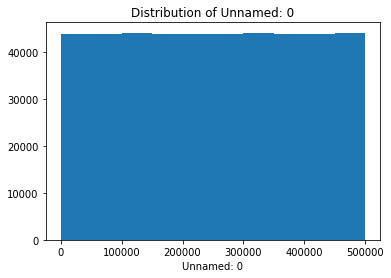

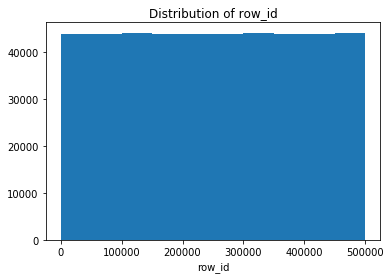

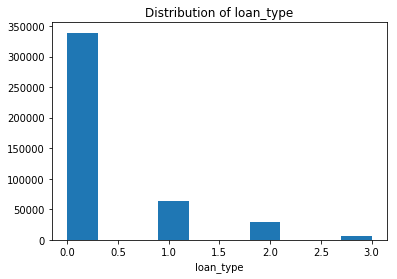

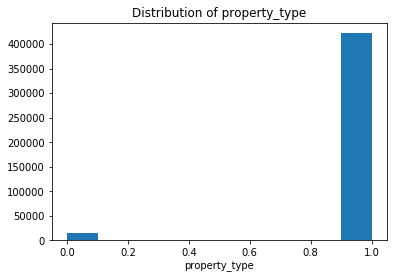

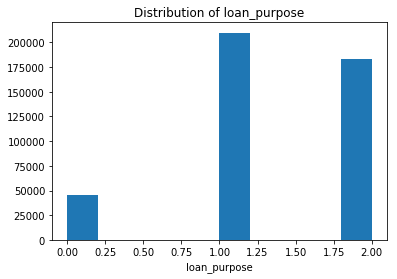

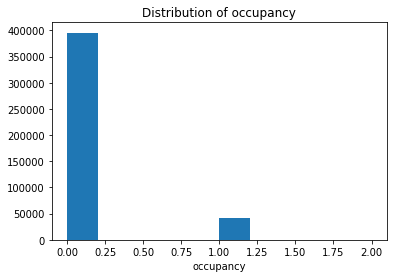

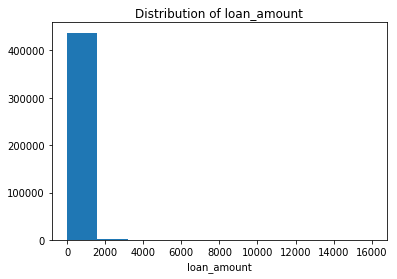

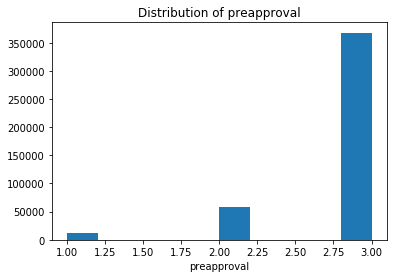

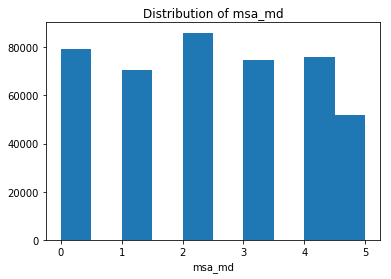

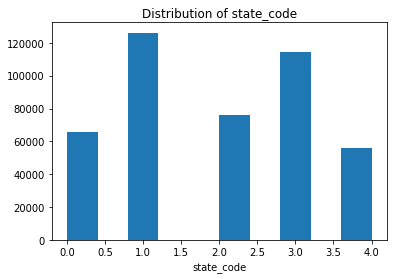

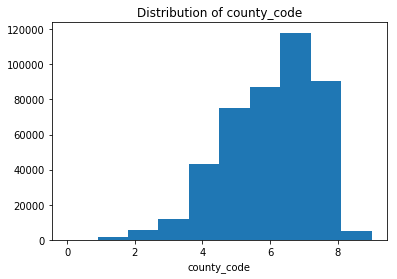

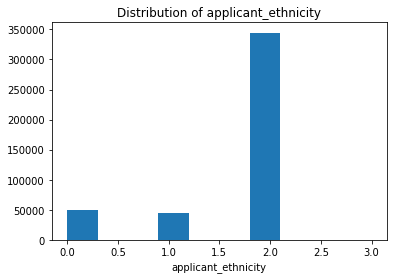

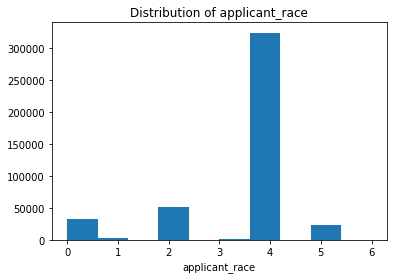

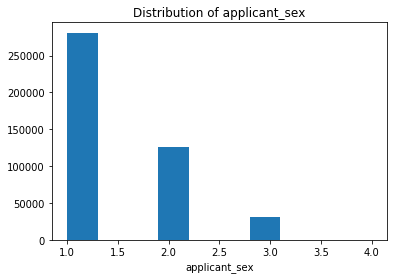

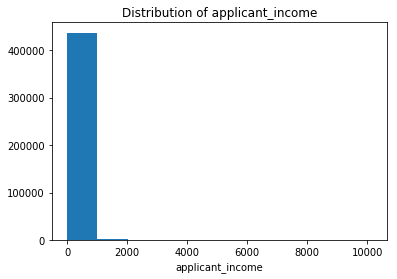

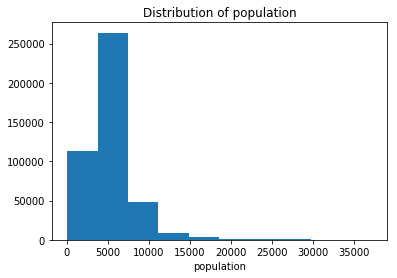

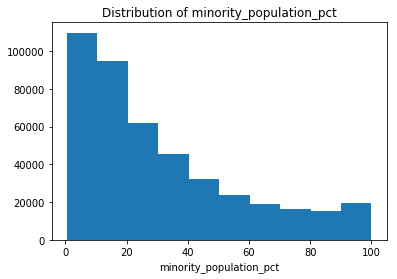

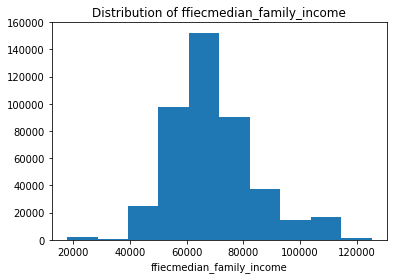

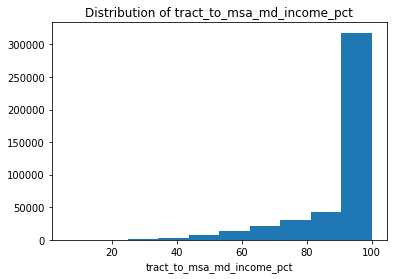

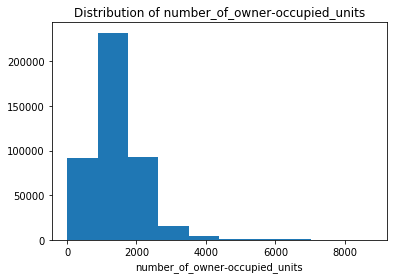

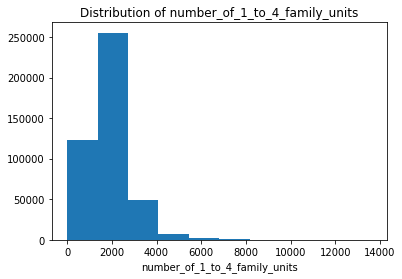

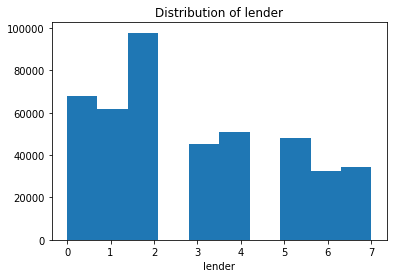

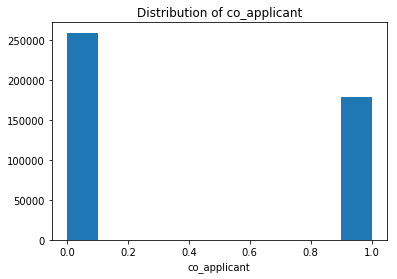

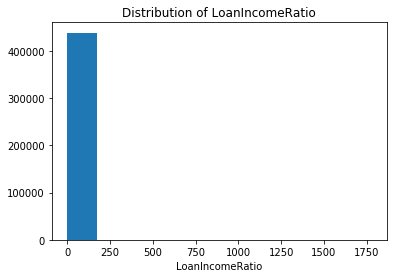

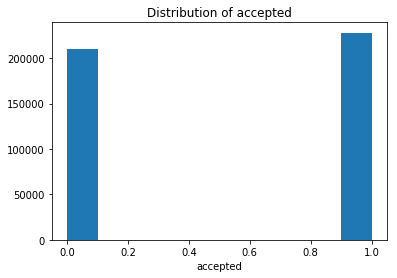

In [28]:
for col in data.columns:
    plt.hist(data[col])
    plt.title("Distribution of " + col)
    plt.xlabel(col)
    plt.show()

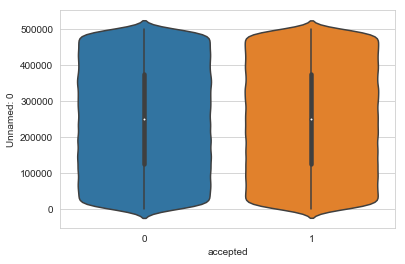

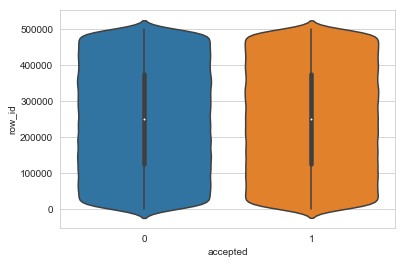

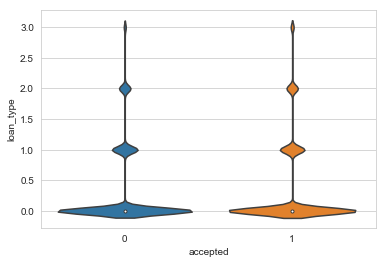

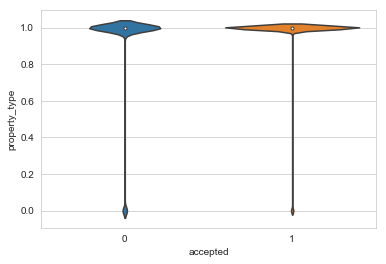

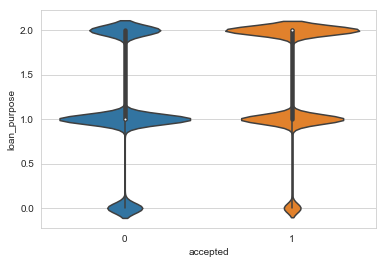

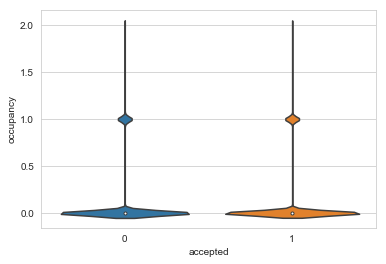

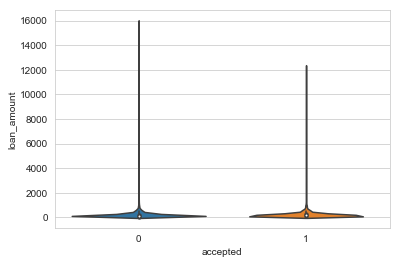

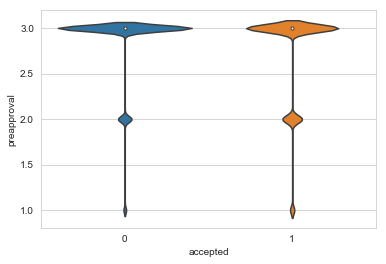

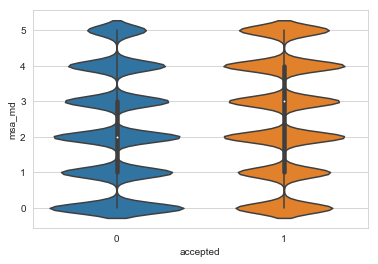

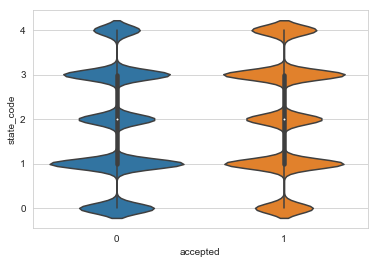

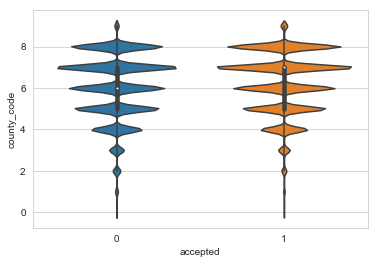

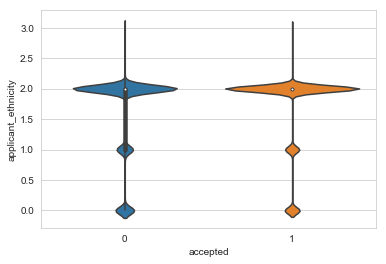

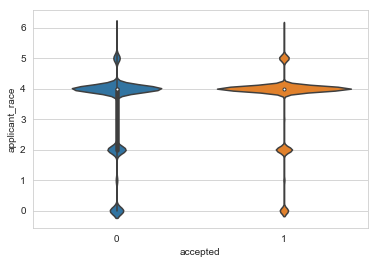

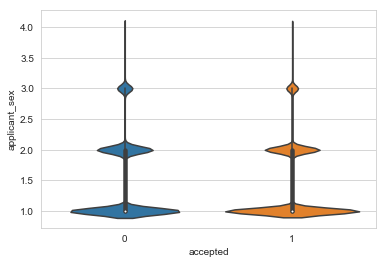

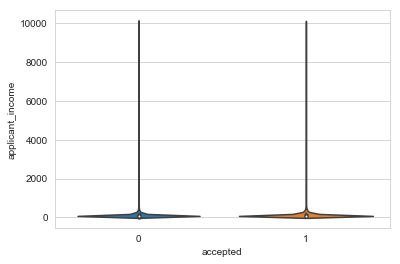

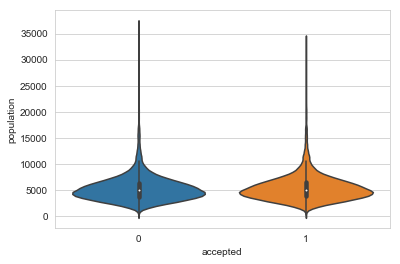

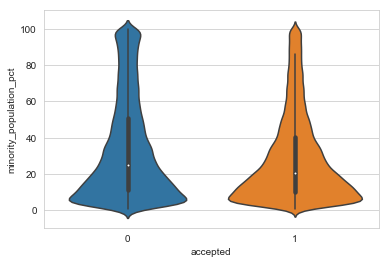

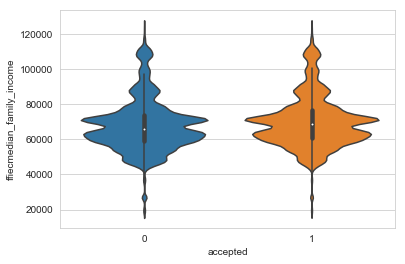

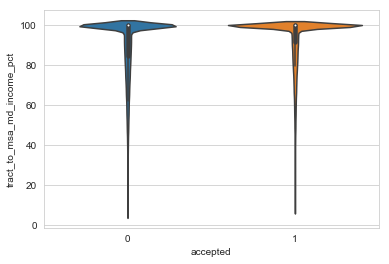

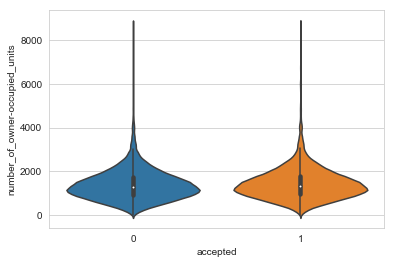

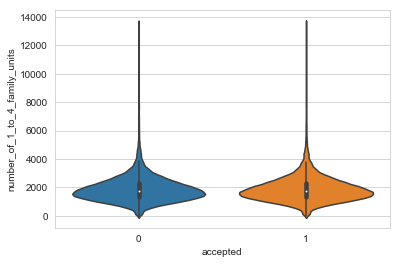

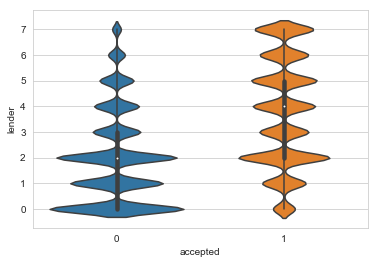

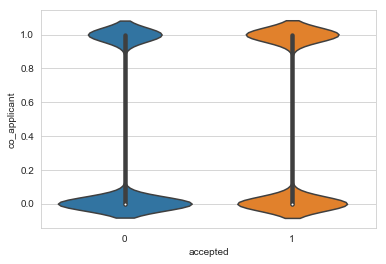

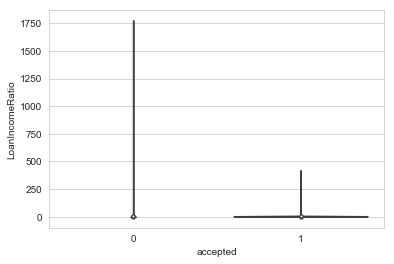

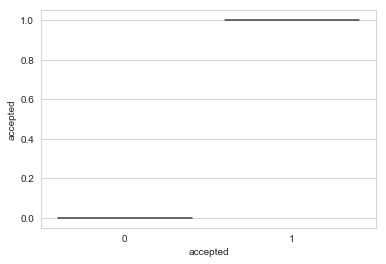

In [30]:
for col in data.columns:
    sns.set_style("whitegrid")
    sns.violinplot("accepted", col, data=data)
    plt.xlabel("accepted") # Set text for the x axis
    plt.ylabel(col)# Set text for y axis
    plt.show()

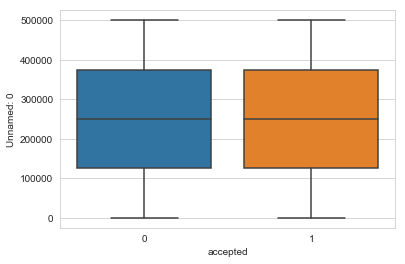

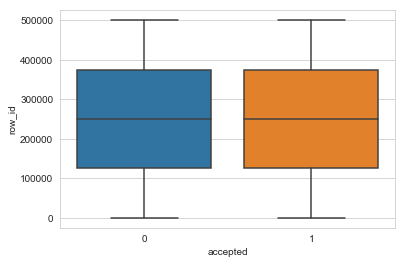

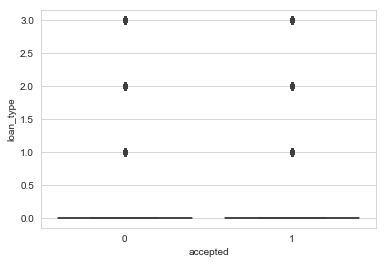

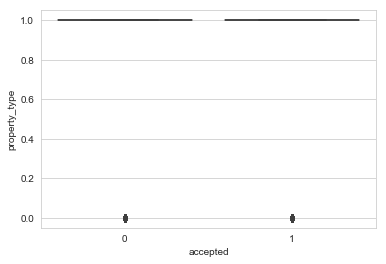

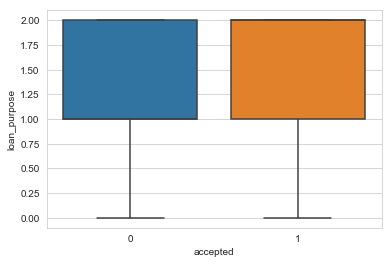

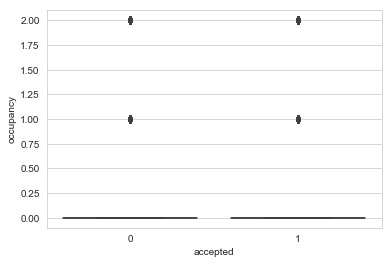

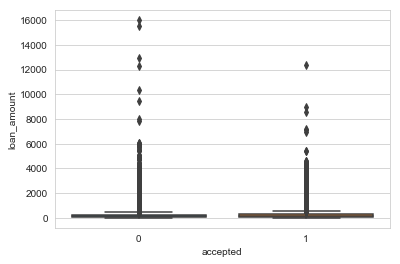

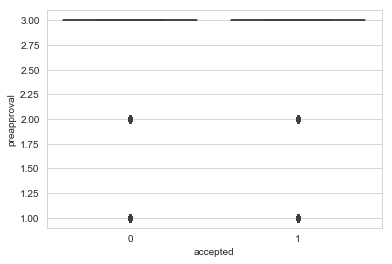

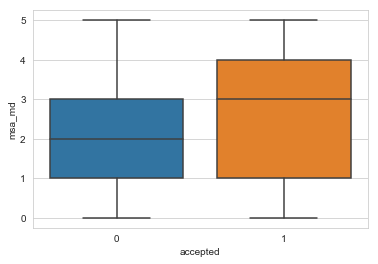

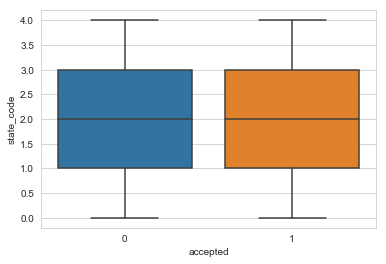

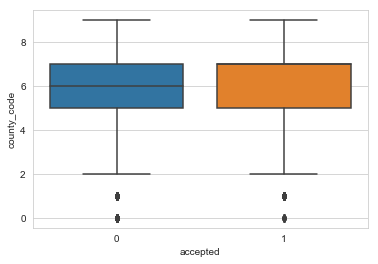

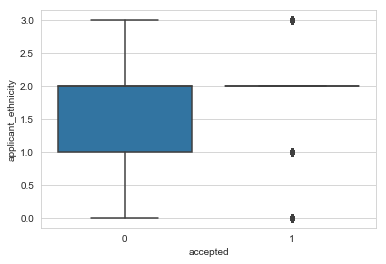

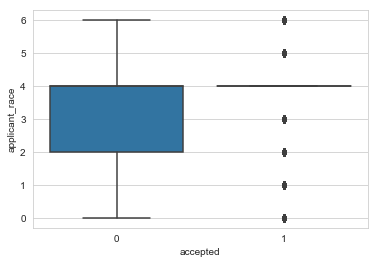

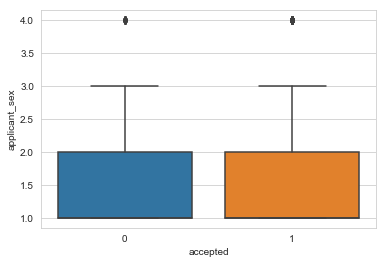

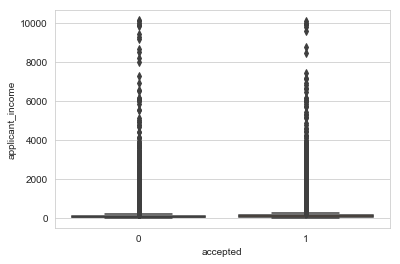

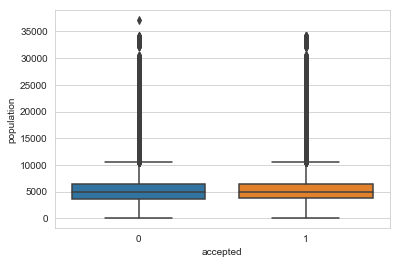

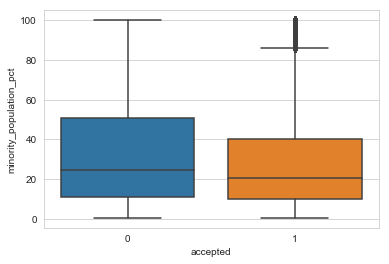

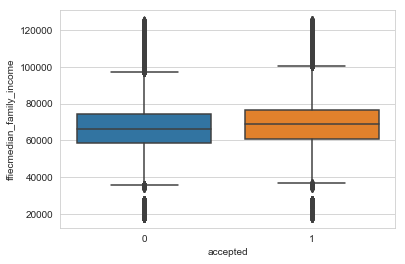

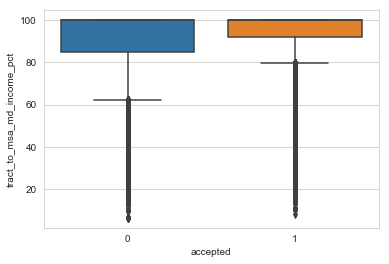

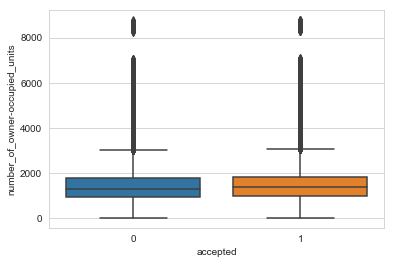

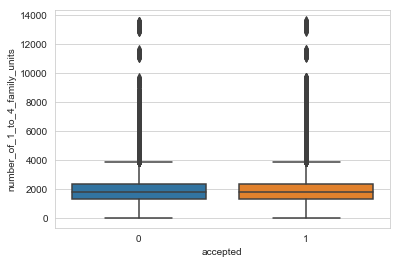

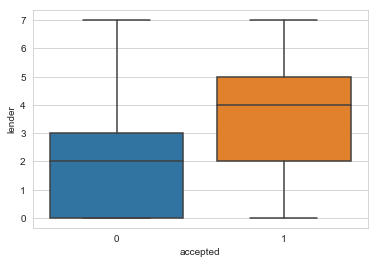

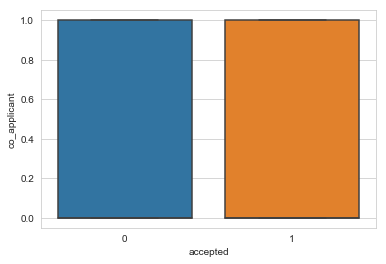

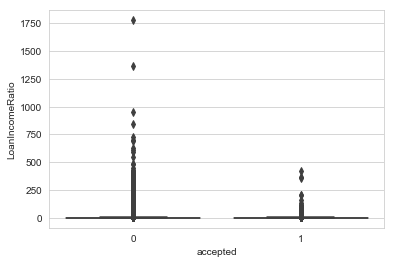

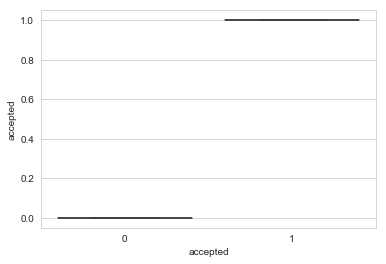

In [31]:
for col in data.columns:
    sns.set_style("whitegrid")
    sns.boxplot("accepted", col, data=data)
    plt.xlabel("accepted") # Set text for the x axis
    plt.ylabel(col)# Set text for y axis
    plt.show()
